In [25]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
TessOI_df = pd.read_csv("https://exofop.ipac.caltech.edu/tess/download_toi.php?sort=toi&output=csv")
TessOI_df.head()

,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar Radius (R_Sun) err,Stellar Metallicity,Stellar Metallicity err,Stellar Mass (M_Sun),Stellar Mass (M_Sun) err,Sectors,Date TOI Alerted (UTC),Date TOI Updated (UTC),Date Modified,Comments
0,231663901,101.01,NaN,5,5,5,5,5,5,5,...,0.043847,NaN,NaN,1.05,0.129454,"1,27",2018-09-05,2021-10-07,2022-12-14 12:09:24,WASP-46 b
1,149603524,102.01,NaN,5,5,5,5,5,5,5,...,0.050000,0.24,0.05,1.28,0.190812,"1,2,3,4,6,7,8,9,10,11,12,13,27,28,29,30,31,32,...",2019-05-07,2023-04-04,2023-04-07 12:13:06,WASP 62 b
2,336732616,103.01,NaN,5,5,5,5,5,5,5,...,NaN,NaN,NaN,1.27,0.196969,1,2018-09-05,2020-10-27,2022-12-14 12:09:24,HATS-3 b
3,231670397,104.01,NaN,5,5,5,5,5,5,5,...,0.102573,NaN,NaN,1.16,0.166129,"1,27",2018-09-05,2021-12-01,2022-12-14 12:09:24,WASP-73 b
4,144065872,105.01,NaN,5,5,5,5,5,5,5,...,0.059699,NaN,NaN,1.03,0.127209,"1,28",2018-09-05,2021-12-08,2022-12-14 12:09:24,WASP-95; epoch kept from qlp-s28-tois


In [26]:
TessOI_df.columns

Index(['TIC ID', 'TOI', 'Previous CTOI', 'Master', 'SG1A', 'SG1B', 'SG2',
       'SG3', 'SG4', 'SG5', 'ESM', 'TSM', 'Predicted Mass (M_Earth)',
       'Time Series Observations', 'Spectroscopy Observations',
       'Imaging Observations', 'TESS Disposition', 'TFOPWG Disposition',
       'TESS Mag', 'TESS Mag err', 'Planet Name', 'Pipeline Signal ID',
       'Source', 'Detection', 'RA', 'Dec', 'PM RA (mas/yr)',
       'PM RA err (mas/yr)', 'PM Dec (mas/yr)', 'PM Dec err (mas/yr)',
       'Epoch (BJD)', 'Epoch (BJD) err', 'Period (days)', 'Period (days) err',
       'Duration (hours)', 'Duration (hours) err', 'Depth (mmag)',
       'Depth (mmag) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth)', 'Planet Radius (R_Earth) err',
       'Planet Insolation (Earth Flux)', 'Planet Equil Temp (K)', 'Planet SNR',
       'Stellar Distance (pc)', 'Stellar Distance (pc) err',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar 

In [27]:
TessOI_PC_df = TessOI_df.copy()
TessOI_TnF_df = TessOI_df.copy()

In [28]:
# Drop the non-beneficial ID columns
TessOI_TnF_df  = TessOI_TnF_df.drop(['TIC ID', 'TOI', 'Previous CTOI', 'Master', 'SG1A', 'SG1B', 'SG2',
       'SG3', 'SG4', 'SG5', 'ESM', 'TSM', 'Predicted Mass (M_Earth)',
       'Time Series Observations', 'Spectroscopy Observations',
       'Imaging Observations','TESS Disposition',
       'TESS Mag err', 'Planet Name', 'Pipeline Signal ID',
       'Source', 'Detection', 'RA', 'Dec',
       'PM RA err (mas/yr)', 'PM Dec err (mas/yr)', 'Epoch (BJD) err', 'Period (days) err',
       'Duration (hours) err', 'Depth (mmag)',
       'Depth (mmag) err', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err',
       'Planet SNR',
       'Stellar Distance (pc) err',
       'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2) err',
       'Stellar Radius (R_Sun) err','PM RA (mas/yr)','PM Dec (mas/yr)',
       'Stellar Metallicity', 'Stellar Metallicity err',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err', 'Sectors',
       'Date TOI Alerted (UTC)', 'Date TOI Updated (UTC)', 'Date Modified',
       'Comments'],1)
TessOI_df.head()


c:\Users\ethan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar Radius (R_Sun) err,Stellar Metallicity,Stellar Metallicity err,Stellar Mass (M_Sun),Stellar Mass (M_Sun) err,Sectors,Date TOI Alerted (UTC),Date TOI Updated (UTC),Date Modified,Comments
0,231663901,101.01,NaN,5,5,5,5,5,5,5,...,0.043847,NaN,NaN,1.05,0.129454,"1,27",2018-09-05,2021-10-07,2022-12-14 12:09:24,WASP-46 b
1,149603524,102.01,NaN,5,5,5,5,5,5,5,...,0.050000,0.24,0.05,1.28,0.190812,"1,2,3,4,6,7,8,9,10,11,12,13,27,28,29,30,31,32,...",2019-05-07,2023-04-04,2023-04-07 12:13:06,WASP 62 b
2,336732616,103.01,NaN,5,5,5,5,5,5,5,...,NaN,NaN,NaN,1.27,0.196969,1,2018-09-05,2020-10-27,2022-12-14 12:09:24,HATS-3 b
3,231670397,104.01,NaN,5,5,5,5,5,5,5,...,0.102573,NaN,NaN,1.16,0.166129,"1,27",2018-09-05,2021-12-01,2022-12-14 12:09:24,WASP-73 b
4,144065872,105.01,NaN,5,5,5,5,5,5,5,...,0.059699,NaN,NaN,1.03,0.127209,"1,28",2018-09-05,2021-12-08,2022-12-14 12:09:24,WASP-95; epoch kept from qlp-s28-tois


In [29]:
TessOI_TnF_df = TessOI_TnF_df.drop(TessOI_TnF_df.loc[(TessOI_TnF_df["TFOPWG Disposition"] == "APC")|(TessOI_TnF_df["TFOPWG Disposition"] == "PC")].index)


In [30]:
TessOI_TnF_df["TFOPWG Disposition"].value_counts()


FP    923
KP    512
CP    342
FA     80
Name: TFOPWG Disposition, dtype: int64

In [31]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
false_types_to_replace = ["FP","FA"]
true_types_to_replace = ["KP","CP"]
# Replace in dataframe
for app in false_types_to_replace:
    TessOI_TnF_df["TFOPWG Disposition"] = TessOI_TnF_df["TFOPWG Disposition"].replace(app,0)

for app in true_types_to_replace:
    TessOI_TnF_df["TFOPWG Disposition"] = TessOI_TnF_df["TFOPWG Disposition"].replace(app,1)
# Check to make sure binning was successful
TessOI_TnF_df["TFOPWG Disposition"].value_counts()


0.0    1003
1.0     854
Name: TFOPWG Disposition, dtype: int64

In [32]:
TessOI_TnF_df.head()

,TFOPWG Disposition,TESS Mag,Epoch (BJD),Period (days),Duration (hours),Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun)
0,1.0,12.4069,2.459037e+06,1.430369,1.643873,19151.216214,13.250493,1281.241792,1525.905097,375.310,5600.0,4.48851,0.890774
1,1.0,9.7109,2.460011e+06,4.411938,3.728000,15219.000000,15.569000,782.274000,1473.000000,175.631,6280.0,4.32092,1.210000
2,1.0,11.5232,2.458327e+06,3.547854,3.494333,10424.371800,14.581841,1212.004376,1504.858953,411.211,6351.0,4.22896,1.400000
3,1.0,9.8638,2.459039e+06,4.087299,5.586113,3572.171250,13.623773,2242.360540,1755.076738,316.678,6036.0,3.93359,2.218670
4,1.0,9.4995,2.459085e+06,2.184667,2.865280,11708.022855,13.702853,1362.138143,1549.440980,137.544,5630.0,4.37759,1.238240


In [33]:
TessOI_TnF_df = TessOI_TnF_df.dropna()
TessOI_TnF_df

,TFOPWG Disposition,TESS Mag,Epoch (BJD),Period (days),Duration (hours),Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun)
0,1.0,12.4069,2.459037e+06,1.430369,1.643873,19151.216214,13.250493,1281.241792,1525.905097,375.310,5600.0,4.48851,0.890774
1,1.0,9.7109,2.460011e+06,4.411938,3.728000,15219.000000,15.569000,782.274000,1473.000000,175.631,6280.0,4.32092,1.210000
2,1.0,11.5232,2.458327e+06,3.547854,3.494333,10424.371800,14.581841,1212.004376,1504.858953,411.211,6351.0,4.22896,1.400000
3,1.0,9.8638,2.459039e+06,4.087299,5.586113,3572.171250,13.623773,2242.360540,1755.076738,316.678,6036.0,3.93359,2.218670
4,1.0,9.4995,2.459085e+06,2.184667,2.865280,11708.022855,13.702853,1362.138143,1549.440980,137.544,5630.0,4.37759,1.238240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6301,1.0,12.1088,2.459849e+06,2.709631,3.282000,10819.000000,14.997200,1041.160000,1582.000000,535.689,5838.0,4.12000,1.470000
6401,1.0,11.8134,2.459991e+06,4.374461,3.048449,3270.982856,6.463777,419.437883,1154.214864,343.525,5677.0,4.34735,1.115630
6405,1.0,13.9069,2.460017e+06,3.052057,3.481779,9403.092601,13.645343,1077.344058,1461.195597,1096.190,5726.0,4.16246,1.387080
6411,1.0,11.6634,2.460019e+06,7.533766,5.584384,4697.175309,10.611119,422.162337,1156.084613,446.442,5869.0,4.09453,1.529050


In [34]:
# Split our preprocessed data into our features and target arrays
y = TessOI_TnF_df["TFOPWG Disposition"].values
X = TessOI_TnF_df.drop(["TFOPWG Disposition"],1).values

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)


c:\Users\ethan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


Random Test to find out best values


c:\Users\ethan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


{'optimizer': 'RMSprop', 'hidden_layers': 2, 'epochs': 100, 'batch_size': 60}
13/13 - 0s - loss: 0.3984 - accuracy: 0.8379 - 41ms/epoch - 3ms/step
Loss: 0.3983537554740906, Accuracy: 0.83790522813797


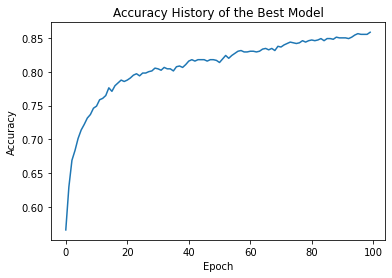

In [36]:
#random
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Function to create model, required for KerasClassifier
def create_model(hidden_layers=1, optimizer='adam'):
    # Define the model - deep neural net
    number_input_features = len(X_train[1])
    hidden_nodes_layer1 = 30
    hidden_nodes_layer2 = 20
    hidden_nodes_layer3 = 10

    nn = tf.keras.models.Sequential()

    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

    # Additional hidden layers
    for i in range(hidden_layers-1):
        if i == 1:
            nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
        elif i == 2:
            nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

    # Output layer
    nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

    # Compile the model
    nn.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics =["accuracy"])

    return nn

# Create KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'hidden_layers': [1, 2, 3],
    'epochs': [30, 40, 50, 60, 70, 80, 90, 100],
    'batch_size': [10, 20, 30, 40, 50, 60],
    'optimizer': ['RMSprop', 'Adam', 'Adamax']
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)


# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_scaled, y_train)

# Get the parameters of the best model
best_params = random_search.best_params_

print(best_params)

# Create a new model with the best parameters
best_model = create_model(hidden_layers=best_params['hidden_layers'], optimizer=best_params['optimizer'])

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)


# Fit the best model to the data
history = best_model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,  # Adding validation split for monitoring validation loss
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[early_stopping],  # Add the early stopping callback
    verbose=0
)

# Evaluate the model on the test data
loss, accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Loss: {loss}, Accuracy: {accuracy}")

# Plot accuracy history
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy History of the Best Model')
plt.show()


Compile, Train and Evaluate the Model

In [ ]:
# # Define the model - deep neural net
# number_input_features = len(X_train[0])
# hidden_nodes_layer1 = 30
# hidden_nodes_layer2 = 20
# hidden_nodes_layer3 = 10

# nn = tf.keras.models.Sequential()

# # First hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# # Output layer
# nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# # Check the structure of the model
# nn.summary()


In [ ]:
# # Compile the model with optimizer rmsprop
# nn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics =["accuracy"])


In [ ]:
# # Early stopping
# from tensorflow.keras.callbacks import EarlyStopping

# # Define the early stopping criteria
# early_stopping = EarlyStopping(monitor='val_loss', patience=40)

# # Train the model
# batch_size = 20
# fit_model = nn.fit(X_train_scaled, y_train, epochs=40, batch_size=batch_size, 
#                    validation_split=0.2, callbacks=[early_stopping])


In [ ]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


In [ ]:
# # # Export our model to HDF5 file
# nn.save('./AlphabetSoupCharity_Optimisation.h5')

Try Prediction with PC data

In [37]:
# Calculate the number of rows where "TFOPWG Disposition" is "PC"
print(TessOI_df[TessOI_df["TFOPWG Disposition"] == "PC"].shape[0])

4343


In [38]:
# Count the number of missing values in the rows where "TFOPWG Disposition" is "PC"
print(TessOI_df[TessOI_df["TFOPWG Disposition"] == "PC"].isnull().sum())


TIC ID                       0
TOI                          0
Previous CTOI             3884
Master                       0
SG1A                         0
                          ... 
Sectors                      0
Date TOI Alerted (UTC)       0
Date TOI Updated (UTC)       0
Date Modified                0
Comments                   254
Length: 62, dtype: int64


In [39]:
# Create a new DataFrame that only contains rows where "TFOPWG Disposition" is "PC"
TessOI_PC_df = TessOI_PC_df[TessOI_PC_df["TFOPWG Disposition"] == "PC"]

In [40]:
# Drop the non-beneficial ID columns
TessOI_PC_df = TessOI_PC_df.drop(['TIC ID', 'TOI', 'Previous CTOI', 'Master', 'SG1A', 'SG1B', 'SG2',
       'SG3', 'SG4', 'SG5', 'ESM', 'TSM', 'Predicted Mass (M_Earth)',
       'Time Series Observations', 'Spectroscopy Observations',
       'Imaging Observations','TESS Disposition',
       'TESS Mag err', 'Planet Name', 'Pipeline Signal ID',
       'Source', 'Detection', 'RA', 'Dec',
       'PM RA err (mas/yr)', 'PM Dec err (mas/yr)', 'Epoch (BJD) err', 'Period (days) err',
       'Duration (hours) err', 'Depth (mmag)',
       'Depth (mmag) err', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err',
       'Planet SNR',
       'Stellar Distance (pc) err',
       'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2) err',
       'Stellar Radius (R_Sun) err','PM RA (mas/yr)','PM Dec (mas/yr)',
       'Stellar Metallicity', 'Stellar Metallicity err',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err', 'Sectors',
       'Date TOI Alerted (UTC)', 'Date TOI Updated (UTC)', 'Date Modified',
       'Comments'],1)


TessOI_PC_df.head()

c:\Users\ethan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,TFOPWG Disposition,TESS Mag,Epoch (BJD),Period (days),Duration (hours),Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun)
18,PC,9.2789,2.460034e+06,5.541110,2.387000,627.000000,1.982620,99.105100,879.000000,66.6187,5332.0,4.56429,0.820000
19,PC,9.2789,2.460039e+06,10.691727,2.974000,519.000000,1.731150,42.265700,710.000000,66.6187,5332.0,4.56429,0.820000
30,PC,7.9849,2.459978e+06,4.940478,1.933000,405.000000,2.161270,168.312000,1003.000000,68.4727,6086.0,4.26269,1.130000
35,PC,9.9762,2.458327e+06,8.199227,2.229889,1015.455819,2.204350,26.236633,577.227180,48.6326,4028.0,4.55902,0.650533
41,PC,9.3636,2.458335e+06,11.070804,2.516083,1291.240534,3.079406,22.422052,554.994383,42.4061,4356.0,4.53491,0.700727


In [41]:
TessOI_PC_df 

,TFOPWG Disposition,TESS Mag,Epoch (BJD),Period (days),Duration (hours),Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun)
18,PC,9.2789,2.460034e+06,5.541110,2.387000,627.000000,1.982620,99.105100,879.000000,66.6187,5332.0,4.56429,0.820000
19,PC,9.2789,2.460039e+06,10.691727,2.974000,519.000000,1.731150,42.265700,710.000000,66.6187,5332.0,4.56429,0.820000
30,PC,7.9849,2.459978e+06,4.940478,1.933000,405.000000,2.161270,168.312000,1003.000000,68.4727,6086.0,4.26269,1.130000
35,PC,9.9762,2.458327e+06,8.199227,2.229889,1015.455819,2.204350,26.236633,577.227180,48.6326,4028.0,4.55902,0.650533
41,PC,9.3636,2.458335e+06,11.070804,2.516083,1291.240534,3.079406,22.422052,554.994383,42.4061,4356.0,4.53491,0.700727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,PC,13.3935,2.459978e+06,5.495078,2.962000,5504.000000,10.078200,469.613000,1296.000000,1011.0800,6852.0,4.26000,1.500000
6586,PC,12.8743,2.459987e+06,5.247774,3.138000,6694.000000,8.533620,239.402000,1095.000000,538.4700,5647.0,4.36000,1.100000
6587,PC,13.0537,2.459977e+06,6.868847,5.418000,4404.000000,12.815500,854.650000,1506.000000,1344.2500,6621.0,3.99000,1.980000
6588,PC,11.0427,2.459949e+06,22.501292,4.055000,3758.000000,5.017210,22.423000,606.000000,182.4500,5443.0,4.51000,0.900000


In [42]:
TessOI_PC_df_new = TessOI_PC_df.copy()
TessOI_PC_df_new = TessOI_PC_df_new.dropna()

In [43]:
TessOI_PC_df_new

,TFOPWG Disposition,TESS Mag,Epoch (BJD),Period (days),Duration (hours),Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun)
18,PC,9.2789,2.460034e+06,5.541110,2.387000,627.000000,1.982620,99.105100,879.000000,66.6187,5332.0,4.56429,0.820000
19,PC,9.2789,2.460039e+06,10.691727,2.974000,519.000000,1.731150,42.265700,710.000000,66.6187,5332.0,4.56429,0.820000
30,PC,7.9849,2.459978e+06,4.940478,1.933000,405.000000,2.161270,168.312000,1003.000000,68.4727,6086.0,4.26269,1.130000
35,PC,9.9762,2.458327e+06,8.199227,2.229889,1015.455819,2.204350,26.236633,577.227180,48.6326,4028.0,4.55902,0.650533
41,PC,9.3636,2.458335e+06,11.070804,2.516083,1291.240534,3.079406,22.422052,554.994383,42.4061,4356.0,4.53491,0.700727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,PC,13.3935,2.459978e+06,5.495078,2.962000,5504.000000,10.078200,469.613000,1296.000000,1011.0800,6852.0,4.26000,1.500000
6586,PC,12.8743,2.459987e+06,5.247774,3.138000,6694.000000,8.533620,239.402000,1095.000000,538.4700,5647.0,4.36000,1.100000
6587,PC,13.0537,2.459977e+06,6.868847,5.418000,4404.000000,12.815500,854.650000,1506.000000,1344.2500,6621.0,3.99000,1.980000
6588,PC,11.0427,2.459949e+06,22.501292,4.055000,3758.000000,5.017210,22.423000,606.000000,182.4500,5443.0,4.51000,0.900000


In [44]:
# Separate the features from the target
PC_X = TessOI_PC_df_new.drop(["TFOPWG Disposition"],1).values

# Scale the PC data 
PC_X_scaled = X_scaler.transform(PC_X)

# Use the model to make predictions
PC_predictions = best_model.predict(PC_X_scaled)

# Convert these probabilities into class predictions
PC_predictions_class = (PC_predictions > 0.5).astype("int32")

 88/118 [=====================>........] - ETA: 0s

c:\Users\ethan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


118/118 [==============================] - 0s 1ms/step


In [45]:
# Add the prediction classes to  dataframe
TessOI_PC_df_new["Predictions"] = PC_predictions_class

In [46]:
#Check
TessOI_PC_df_new

,TFOPWG Disposition,TESS Mag,Epoch (BJD),Period (days),Duration (hours),Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun),Predictions
18,PC,9.2789,2.460034e+06,5.541110,2.387000,627.000000,1.982620,99.105100,879.000000,66.6187,5332.0,4.56429,0.820000,1
19,PC,9.2789,2.460039e+06,10.691727,2.974000,519.000000,1.731150,42.265700,710.000000,66.6187,5332.0,4.56429,0.820000,1
30,PC,7.9849,2.459978e+06,4.940478,1.933000,405.000000,2.161270,168.312000,1003.000000,68.4727,6086.0,4.26269,1.130000,1
35,PC,9.9762,2.458327e+06,8.199227,2.229889,1015.455819,2.204350,26.236633,577.227180,48.6326,4028.0,4.55902,0.650533,1
41,PC,9.3636,2.458335e+06,11.070804,2.516083,1291.240534,3.079406,22.422052,554.994383,42.4061,4356.0,4.53491,0.700727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,PC,13.3935,2.459978e+06,5.495078,2.962000,5504.000000,10.078200,469.613000,1296.000000,1011.0800,6852.0,4.26000,1.500000,1
6586,PC,12.8743,2.459987e+06,5.247774,3.138000,6694.000000,8.533620,239.402000,1095.000000,538.4700,5647.0,4.36000,1.100000,1
6587,PC,13.0537,2.459977e+06,6.868847,5.418000,4404.000000,12.815500,854.650000,1506.000000,1344.2500,6621.0,3.99000,1.980000,1
6588,PC,11.0427,2.459949e+06,22.501292,4.055000,3758.000000,5.017210,22.423000,606.000000,182.4500,5443.0,4.51000,0.900000,1


In [47]:
# Filter rows where "Predictions" column is equal to 1
filtered_rows = TessOI_PC_df_new[TessOI_PC_df_new["Predictions"] == 1]

# Check
filtered_rows


,TFOPWG Disposition,TESS Mag,Epoch (BJD),Period (days),Duration (hours),Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun),Predictions
18,PC,9.2789,2.460034e+06,5.541110,2.387000,627.000000,1.982620,99.105100,879.000000,66.6187,5332.0,4.56429,0.820000,1
19,PC,9.2789,2.460039e+06,10.691727,2.974000,519.000000,1.731150,42.265700,710.000000,66.6187,5332.0,4.56429,0.820000,1
30,PC,7.9849,2.459978e+06,4.940478,1.933000,405.000000,2.161270,168.312000,1003.000000,68.4727,6086.0,4.26269,1.130000,1
35,PC,9.9762,2.458327e+06,8.199227,2.229889,1015.455819,2.204350,26.236633,577.227180,48.6326,4028.0,4.55902,0.650533,1
41,PC,9.3636,2.458335e+06,11.070804,2.516083,1291.240534,3.079406,22.422052,554.994383,42.4061,4356.0,4.53491,0.700727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,PC,13.3935,2.459978e+06,5.495078,2.962000,5504.000000,10.078200,469.613000,1296.000000,1011.0800,6852.0,4.26000,1.500000,1
6586,PC,12.8743,2.459987e+06,5.247774,3.138000,6694.000000,8.533620,239.402000,1095.000000,538.4700,5647.0,4.36000,1.100000,1
6587,PC,13.0537,2.459977e+06,6.868847,5.418000,4404.000000,12.815500,854.650000,1506.000000,1344.2500,6621.0,3.99000,1.980000,1
6588,PC,11.0427,2.459949e+06,22.501292,4.055000,3758.000000,5.017210,22.423000,606.000000,182.4500,5443.0,4.51000,0.900000,1


In [48]:
# Export the whole csv
output_file_path = "Total data with Predicition_Final.csv"

TessOI_PC_df_new.to_csv(output_file_path, index=False)


In [50]:
# Export only prediction data with "1"
output_file_path = "Prediction with 1 only_final.csv"

filtered_rows.to_csv(output_file_path, index=False)
